In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml

# Paths to the dataset splits
train_images_path = '/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/train'
val_images_path = '/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/val'
test_images_path = '/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test'

# Define the names of your classes (adjust this list based on your dataset)
class_names = ['fish_larvae']  # Update if you have more than one class

# YAML content
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(class_names),  # Number of classes
    'names': class_names     # Class names
}

# Output path for the YAML file
output_yaml_path = '/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/data.yaml'

# Write the YAML file
with open(output_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"YAML file created at {output_yaml_path}")

YAML file created at /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/data.yaml


In [ ]:
!nvidia-smi

Fri Jan 17 05:39:29 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 14.2 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

results = model.train(
    data="/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/data.yaml",
    epochs=100,
    imgsz=640,
    project="/content/drive/MyDrive/yolov11/runs/",
    name="experiment_unet"  # Change name for each dataset experiment
)


100%|██████████| 5.35M/5.35M [00:00<00:00, 362MB/s]

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov11/runs/, name=experiment_unet2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 133MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/labels/train.cache... 2021 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2021/2021 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/labels/val.cache... 578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 578/578 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov11/runs/experiment_unet2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/yolov11/runs/experiment_unet2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G     0.9259      1.418     0.9037         24        640: 100%|██████████| 127/127 [00:27<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


                   all        578       1784       0.97      0.963      0.982      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.44G      0.676     0.7309     0.8384          7        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.99it/s]

                   all        578       1784      0.976      0.961      0.976      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.44G      0.636     0.5942     0.8351         23        640: 100%|██████████| 127/127 [00:21<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        578       1784      0.978      0.972      0.981      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.44G     0.5958     0.5023     0.8274         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.974      0.973      0.983      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.45G     0.5801     0.4606     0.8227         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.41it/s]

                   all        578       1784       0.98      0.978      0.985      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G     0.5595     0.4361     0.8229         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        578       1784      0.973      0.979      0.986      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.44G     0.5327     0.4143      0.813         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.41it/s]

                   all        578       1784      0.983      0.971      0.985      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.45G      0.521     0.3986     0.8176         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784      0.982      0.974      0.985      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.45G     0.5029     0.3875     0.8141         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.42it/s]

                   all        578       1784      0.982      0.976      0.986      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.45G     0.5078     0.3812     0.8139         16        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        578       1784      0.987      0.979      0.986      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.44G     0.4796     0.3672     0.8103         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.50it/s]

                   all        578       1784      0.973      0.964      0.983      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.45G     0.4814     0.3621      0.812         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.981      0.978      0.986        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.42G      0.463     0.3551     0.8072         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.982      0.978      0.985      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G     0.4711     0.3496     0.8081         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.45it/s]

                   all        578       1784      0.984       0.98      0.986      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.43G      0.469      0.348     0.8085         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        578       1784      0.978       0.98      0.986      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.44G      0.451     0.3386     0.8072         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.42it/s]

                   all        578       1784       0.98      0.982      0.986      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.44G     0.4545     0.3397     0.8045         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784      0.985      0.983      0.987      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.44G     0.4454     0.3289     0.8074         26        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.986      0.978      0.987      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G     0.4367     0.3252     0.8043         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        578       1784      0.983      0.981      0.985      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.47G     0.4396     0.3278     0.8042         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.40it/s]

                   all        578       1784      0.985      0.982      0.985      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.42G     0.4449     0.3304     0.8064         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.983      0.978      0.986       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.44G      0.435     0.3181     0.8032         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.38it/s]

                   all        578       1784      0.984      0.976      0.988      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.44G     0.4235     0.3161     0.8029         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        578       1784      0.988      0.974      0.987      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.44G     0.4316     0.3204     0.8035         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.40it/s]

                   all        578       1784      0.983      0.976      0.985       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.45G     0.4248     0.3134     0.8015         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.38it/s]

                   all        578       1784      0.987      0.978      0.987      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.45G     0.4245     0.3092     0.8025         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.24it/s]

                   all        578       1784      0.982      0.978      0.985      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G     0.4124     0.3046     0.8005         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.33it/s]

                   all        578       1784      0.986      0.979      0.986      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.45G     0.4245     0.3033     0.8017         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.982       0.98      0.987      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G     0.4124     0.3041      0.802         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.45it/s]

                   all        578       1784      0.987      0.978      0.984      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.45G       0.41     0.3017     0.8004         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.985       0.98      0.985      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.43G      0.408     0.2972     0.8007         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.982      0.982      0.986      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.44G     0.4155     0.2974     0.7995         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.985      0.978      0.985      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G     0.4089     0.2966     0.7998         26        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.42it/s]

                   all        578       1784      0.988      0.977      0.986      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.45G      0.393     0.2872     0.7998         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.988       0.98      0.986      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.43G     0.4009     0.2915      0.798         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.45it/s]

                   all        578       1784      0.983      0.984      0.986      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.45G     0.4005     0.2919     0.7985         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.43it/s]

                   all        578       1784      0.985      0.983      0.987       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.45G     0.3941      0.288     0.8013         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.38it/s]

                   all        578       1784      0.983      0.983      0.985      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.45G     0.4042     0.2937     0.7994         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.44it/s]

                   all        578       1784      0.988      0.983      0.986      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.44G     0.3825     0.2789     0.7957         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784      0.989      0.981      0.986      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.44G     0.3864     0.2777     0.7977         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.40it/s]

                   all        578       1784      0.983      0.983      0.986      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.47G     0.3919     0.2796      0.796         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784       0.99      0.981      0.986       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.44G     0.3903     0.2748     0.7973         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.48it/s]

                   all        578       1784      0.986       0.98      0.986      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.43G     0.3909     0.2798     0.7961         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        578       1784      0.987       0.98      0.986      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.45G     0.3901     0.2754     0.7982         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.37it/s]

                   all        578       1784      0.986      0.978      0.988      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.44G     0.3805     0.2742     0.8017         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        578       1784      0.989      0.981      0.987       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G     0.3766     0.2711     0.7941         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.39it/s]

                   all        578       1784      0.989      0.982      0.987      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.43G     0.3805     0.2733     0.7947         28        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784      0.988      0.983      0.987      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G     0.3796     0.2738     0.7986         33        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.41it/s]

                   all        578       1784      0.983      0.983      0.986      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.45G     0.3726     0.2692     0.7938         25        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]

                   all        578       1784      0.989      0.979      0.988      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.47G     0.3749     0.2673     0.7975         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.987       0.98      0.986      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.43G      0.375     0.2683     0.7943         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.44it/s]

                   all        578       1784      0.986      0.981      0.987      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.44G     0.3689     0.2679     0.7942         33        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        578       1784      0.989      0.983      0.988      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.44G     0.3836     0.2743     0.7986         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.44it/s]

                   all        578       1784      0.987      0.979      0.986      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.47G     0.3695     0.2626     0.7935         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.988      0.981      0.987       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.44G     0.3588     0.2594     0.7938         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784      0.988      0.984      0.988      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.45G     0.3639     0.2581     0.7962         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.92it/s]

                   all        578       1784       0.99      0.982      0.988      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.44G     0.3671     0.2588     0.7948         31        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.46it/s]

                   all        578       1784      0.989      0.979      0.988      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.45G     0.3627     0.2568     0.7931         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.988      0.984      0.986      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.44G     0.3576     0.2552     0.7933         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.46it/s]

                   all        578       1784      0.985      0.981      0.987      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G     0.3595     0.2548     0.7922         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.986       0.98      0.987      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.45G     0.3597     0.2562     0.7955         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        578       1784      0.993      0.983      0.987      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.45G     0.3572     0.2544     0.7972         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.43it/s]

                   all        578       1784      0.987      0.983      0.987       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.44G     0.3461     0.2494     0.7913         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784      0.988       0.98      0.986       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.47G     0.3544     0.2522     0.7944         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784       0.99      0.982      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G     0.3541     0.2497     0.7916         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.05it/s]

                   all        578       1784      0.988      0.979      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.45G      0.349      0.248     0.7933         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.38it/s]

                   all        578       1784      0.992      0.982      0.987       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.43G     0.3461     0.2463     0.7942         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.988      0.984      0.987       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.45G     0.3422     0.2431     0.7916         28        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.42it/s]

                   all        578       1784      0.991      0.981      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.45G     0.3488     0.2476     0.7922         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.988      0.981      0.986      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.42G     0.3458      0.241      0.794         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784      0.984      0.982      0.987      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.45G     0.3418     0.2417     0.7933         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.46it/s]

                   all        578       1784      0.989      0.981      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.44G     0.3357     0.2364     0.7925         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784       0.99      0.981      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.44G     0.3382     0.2408     0.7941         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.41it/s]

                   all        578       1784       0.99      0.982      0.986      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.45G     0.3398     0.2391     0.7913         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784       0.99      0.982      0.987      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.43G     0.3352     0.2353     0.7917         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.33it/s]

                   all        578       1784       0.99      0.981      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.44G     0.3341      0.237     0.7899         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784       0.99      0.982      0.987      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.45G     0.3253     0.2288     0.7922         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.38it/s]

                   all        578       1784      0.991      0.983      0.988      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.44G     0.3317     0.2323     0.7918         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        578       1784      0.988      0.983      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.43G     0.3331     0.2348     0.7922         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.36it/s]

                   all        578       1784      0.991      0.984      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.45G     0.3238     0.2264      0.791         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        578       1784       0.99      0.982      0.988      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.45G     0.3209     0.2254     0.7881         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784      0.988      0.983      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.45G     0.3312     0.2265     0.7909         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]

                   all        578       1784       0.99      0.982      0.987      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.44G     0.3252     0.2227     0.7893         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.08it/s]

                   all        578       1784      0.991      0.984      0.988      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.44G     0.3262      0.228     0.7922         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.50it/s]

                   all        578       1784       0.99      0.983      0.987      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.45G     0.3205     0.2234     0.7896         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        578       1784      0.991      0.983      0.986      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.45G     0.3196     0.2209     0.7902         31        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        578       1784      0.994      0.982      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.43G     0.3098     0.2171     0.7913         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        578       1784       0.99      0.984      0.987      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.47G     0.3181      0.219     0.7875         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]

                   all        578       1784      0.993      0.983      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.47G     0.3182       0.22     0.7895         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        578       1784       0.99      0.984      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.45G     0.3153     0.2161     0.7898         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.36it/s]

                   all        578       1784      0.992       0.98      0.987      0.955


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.49G     0.2787     0.2008     0.7799         17        640: 100%|██████████| 127/127 [00:21<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.989      0.983      0.988      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.42G     0.2697     0.1933     0.7788         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.994      0.981      0.987      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.42G     0.2725     0.1944     0.7781         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.995       0.98      0.988      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.42G     0.2704     0.1942     0.7774         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.988      0.982      0.988      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.41G     0.2673     0.1917     0.7783         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.36it/s]

                   all        578       1784      0.991      0.982      0.988      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.42G     0.2646     0.1913     0.7782         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        578       1784      0.992      0.982      0.988      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.42G     0.2611     0.1876     0.7783         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.33it/s]

                   all        578       1784      0.995       0.98      0.988      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.42G     0.2586     0.1843     0.7783          9        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784      0.995      0.979      0.988      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.41G     0.2564     0.1837     0.7787         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.36it/s]

                   all        578       1784      0.991      0.982      0.988      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G     0.2559     0.1826     0.7751         16        640: 100%|██████████| 127/127 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.13it/s]

                   all        578       1784      0.991      0.983      0.988      0.964



100 epochs completed in 0.712 hours.
Optimizer stripped from /content/drive/MyDrive/yolov11/runs/experiment_unet2/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/yolov11/runs/experiment_unet2/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/yolov11/runs/experiment_unet2/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.05it/s]


                   all        578       1784      0.991      0.983      0.988      0.963
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/experiment_unet2


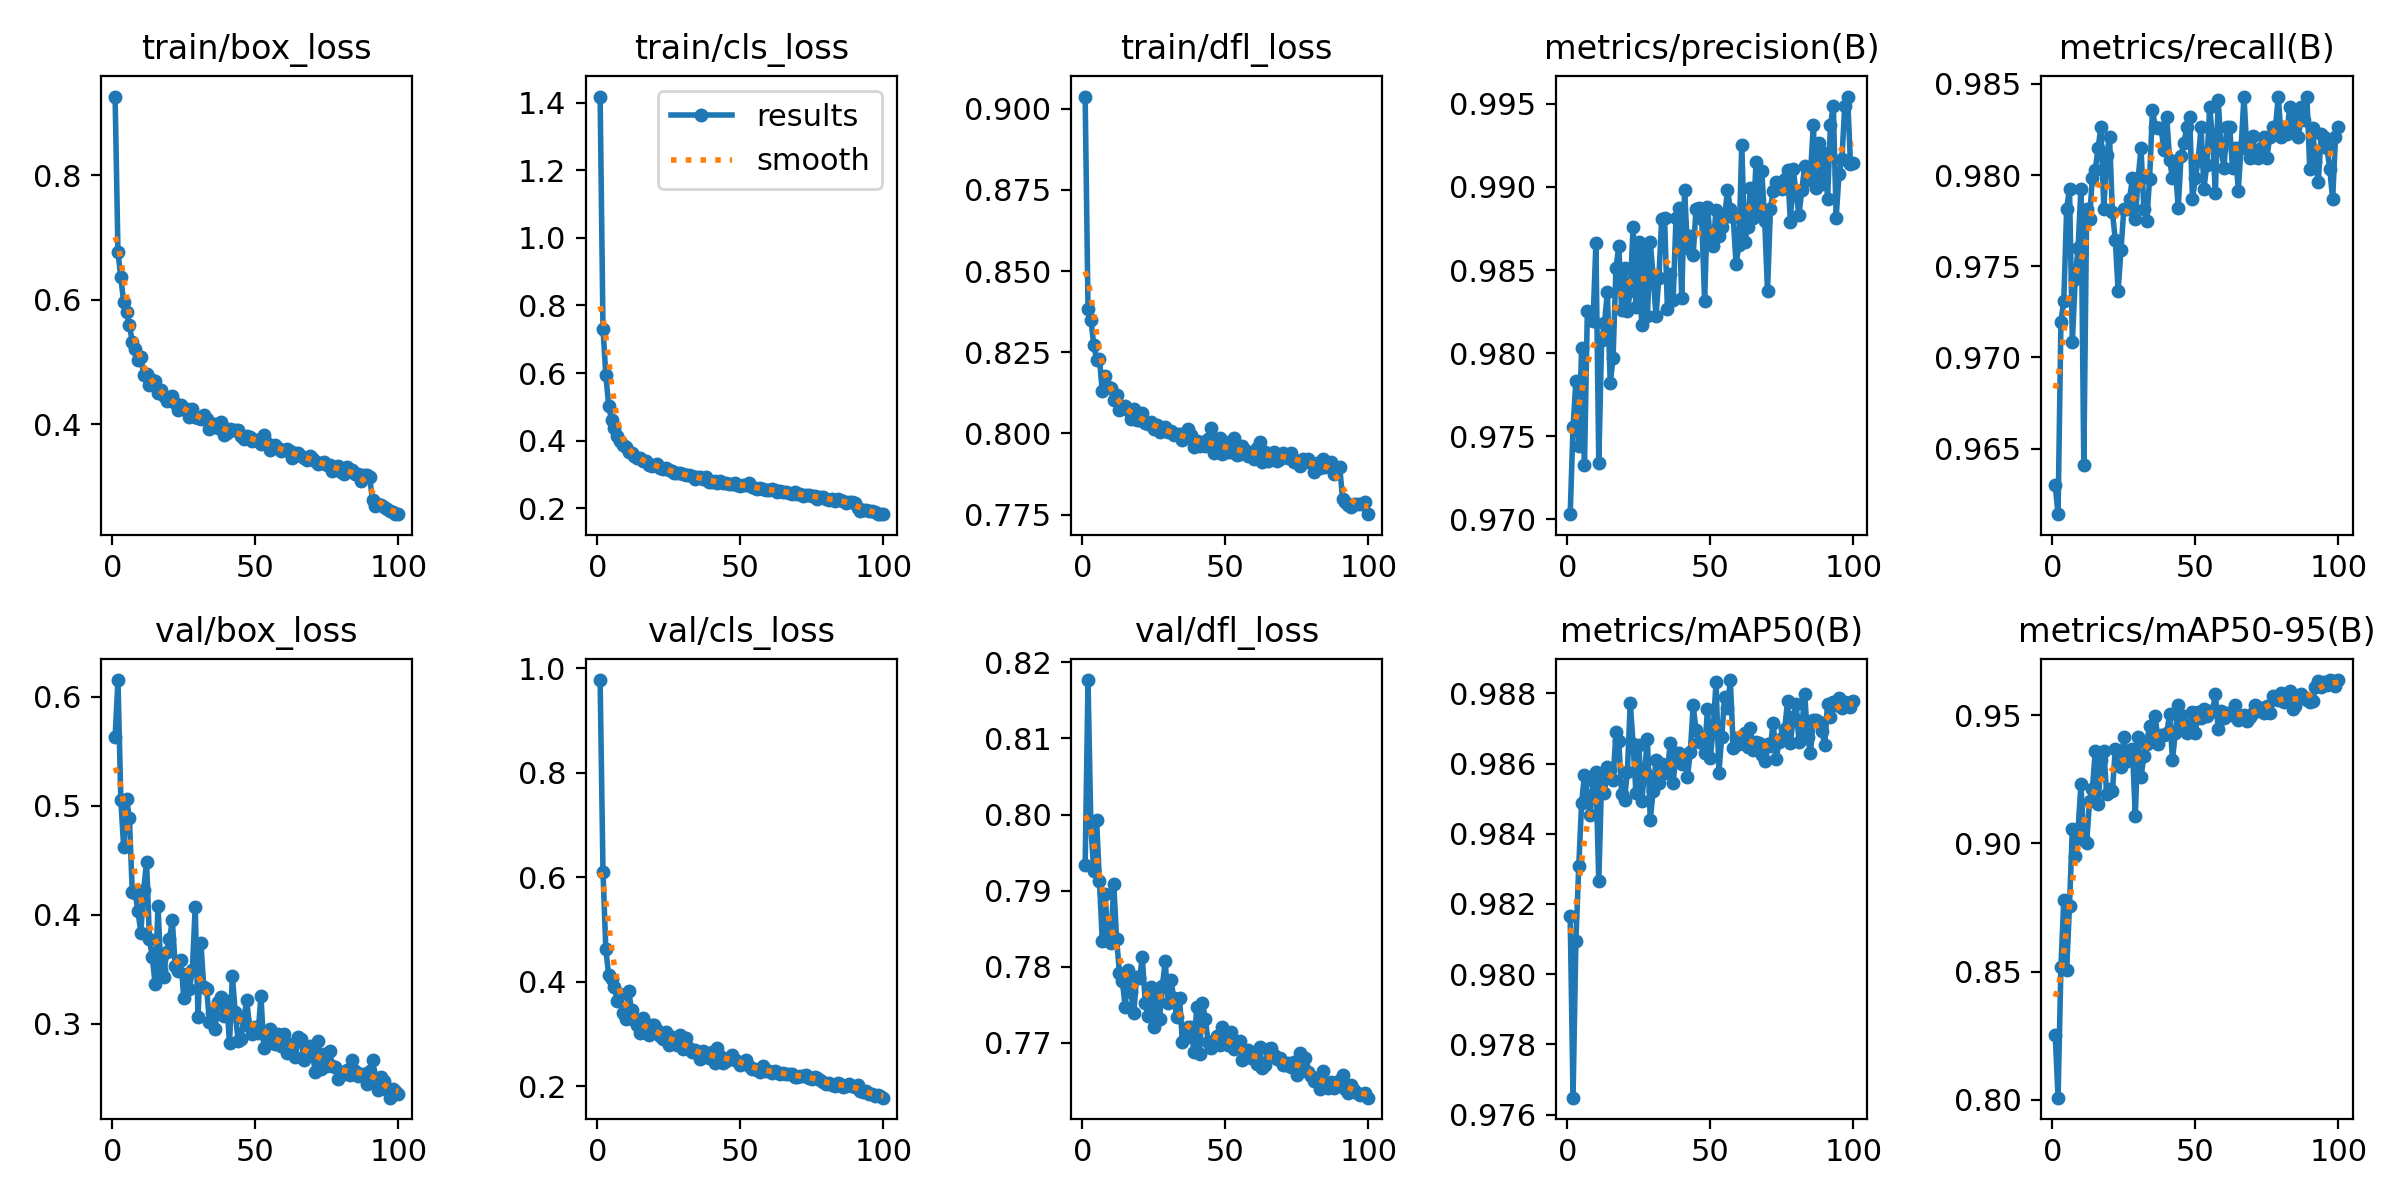

In [ ]:
from IPython.display import Image, display

# Display the results plot from the runs/detect/train directory
display(Image(filename="/content/drive/MyDrive/yolov11/runs/experiment_unet2/results.png"))


In [ ]:
import pandas as pd
import glob

# Locate the latest results CSV file in the detect or train directory
latest_exp = sorted(glob.glob("/content/drive/MyDrive/yolov11/runs/experiment_unet*"))[-1]
results_csv = f"{latest_exp}/results.csv"

# Load the CSV file
results_df = pd.read_csv(results_csv)

# Display the metrics available in the results.csv file
print("Available Metrics:\n", results_df.columns)
print(results_df.tail())  # Display metrics from the final epochs


Available Metrics:
 Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  2463.03         0.26455         0.19132         0.77819   
96     97  2487.88         0.26112         0.18761         0.77830   
97     98  2512.78         0.25857         0.18431         0.77827   
98     99  2537.42         0.25639         0.18366         0.77874   
99    100  2562.13         0.25586         0.18265         0.77514   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.99167            0.98150           0.98759   
96               0.99488            0.98034           0.98775   
97               0.99544            0.97866           0.98772   
98         

In [ ]:
# Display metrics for the final epoch
final_metrics = results_df.iloc[-1]  # Get the last row for the final epoch

print("Final Epoch Metrics:")
print(f"Precision: {final_metrics['metrics/precision(B)']}")
print(f"Recall: {final_metrics['metrics/recall(B)']}")
print(f"mAP@0.5: {final_metrics['metrics/mAP50(B)']}")
print(f"mAP@0.5:0.95: {final_metrics['metrics/mAP50-95(B)']}")



Final Epoch Metrics:
Precision: 0.99143
Recall: 0.98262
mAP@0.5: 0.98777
mAP@0.5:0.95: 0.96368


In [ ]:
import os
import json

# Load the trained model
model = YOLO("/content/drive/MyDrive/yolov11/runs/experiment_unet2/weights/best.pt")  # Replace with the path to your trained weights

# Define the path to your images directory
image_dir = "/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test"
pred_counts = {}  # Dictionary to store predicted counts

# Run inference on each image in the test folder
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)

    # Perform inference with YOLO model
    results = model(image_path)

    # Count detected objects (bounding boxes)
    num_boxes = len(results[0].boxes)

    # Save count with image name
    image_name = image_file.split('.')[0]
    pred_counts[image_name] = num_boxes

# Save predicted counts to a JSON file for comparison
output_file = '/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/predicted_fish_counts.json'
with open(output_file, 'w') as json_file:
    json.dump(pred_counts, json_file)

print(f"Predicted fish counts saved to {output_file}")



image 1/1 /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test/01_img57.png: 640x640 4 fish_larvaes, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test/02_img13.png: 640x640 3 fish_larvaes, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test/01_img170.png: 640x640 3 fish_larvaes, 18.6ms
Speed: 2.1ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test/01_img152.png: 640x640 4 fish_larvaes, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/images/test/03_img190.png: 640x640 5 fish_larvaes, 

In [ ]:
# Example dictionary of true counts and predictions
true_counts = {
  "test/01_img19": 4, "test/01_img184": 3, "test/01_img143": 4, "test/01_img170": 3, "test/01_img114": 4, "test/01_img119": 4, "test/01_img190": 4, "test/01_img152": 4, "test/01_img179": 3, "test/01_img164": 4, "test/02_img206": 3, "test/03_img176": 5, "test/02_img155": 3, "test/02_img220": 3, "test/01_img49": 6, "test/03_img53": 5, "test/01_img67": 3, "test/03_img40": 7, "test/04_img04": 4, "test/01_img249": 4, "test/02_img23": 3, "test/03_img198": 5, "test/02_img213": 3, "test/03_img190": 5, "test/04_img28": 4, "test/01_img51": 4, "test/04_img25": 4, "test/03_img55": 6, "test/01_img239": 5, "test/02_img31": 3, "test/04_img23": 4, "test/01_img86": 4, "test/04_img116": 4, "test/03_img08": 6, "test/02_img42": 3, "test/02_img35": 3, "test/02_img13": 3, "test/03_img06": 6, "test/01_img92": 4, "test/03_img110": 5, "test/01_img32": 4, "test/03_img28": 4, "test/02_img62": 3, "test/03_img180": 5, "test/02_img79": 3, "test/01_img79": 4, "test/01_img253": 4, "test/03_img76": 5, "test/03_img47": 5, "test/02_img03": 3, "test/03_img122": 5, "test/01_img244": 4, "test/02_img121": 3, "test/02_img77": 3, "test/02_img85": 3, "test/02_img152": 3, "test/03_img30": 4, "test/02_img101": 3, "test/04_img19": 4, "test/02_img132": 3, "test/01_img31": 4, "test/03_img91": 5, "test/02_img122": 3, "test/03_img48": 5, "test/01_img40": 4, "test/01_img57": 4, "test/03_img156": 5, "test/04_img107": 4, "test/03_img75": 5, "test/03_img14": 5, "test/02_img159": 3, "test/03_img200": 5, "test/03_img186": 5, "test/03_img18": 6, "test/03_img60": 5, "test/03_img12": 5, "test/02_img165": 3, "test/02_img149": 3, "test/05_img68": 1, "test/05_img343": 1, "test/05_img183": 1, "test/05_img126": 1, "test/06_img124": 1, "test/06_img23": 1, "test/05_img330": 1, "test/05_img65": 1, "test/04_img29": 4, "test/04_img83": 4, "test/04_img62": 4, "test/05_img194": 1, "test/05_img263": 1, "test/07_img107": 4, "test/07_img07": 4, "test/07_img102": 4, "test/06_img118": 1, "test/05_img274": 1, "test/05_img347": 2, "test/06_img88": 1, "test/04_img31": 4, "test/05_img121": 1, "test/06_img80": 1, "test/05_img257": 1, "test/05_img292": 1, "test/06_img03": 1, "test/05_img11": 1, "test/06_img131": 1, "test/05_img164": 1, "test/06_img108": 1, "test/04_img50": 4, "test/06_img01": 1, "test/04_img85": 4, "test/06_img99": 1, "test/04_img51": 4, "test/06_img30": 1, "test/04_img52": 4, "test/06_img83": 1, "test/05_img357": 1, "test/05_img177": 1, "test/06_img137": 1, "test/05_img190": 1, "test/06_img52": 1, "test/05_img240": 1, "test/05_img101": 1, "test/06_img41": 1, "test/05_img354": 1, "test/05_img250": 1, "test/05_img299": 1, "test/05_img228": 1, "test/05_img239": 1, "test/05_img309": 1, "test/05_img356": 1, "test/05_img78": 1, "test/06_img14": 1, "test/05_img94": 1, "test/05_img320": 1, "test/05_img296": 1, "test/06_img119": 1, "test/05_img205": 1, "test/05_img323": 1, "test/05_img95": 1, "test/05_img340": 1, "test/05_img187": 1, "test/04_img66": 4, "test/04_img53": 4, "test/05_img93": 1, "test/05_img115": 1, "test/05_img160": 1, "test/05_img24": 1, "test/05_img05": 1, "test/07_img24": 4, "test/08_img608": 3, "test/08_img190": 3, "test/08_img402": 3, "test/07_img48": 4, "test/08_img364": 3, "test/08_img636": 3, "test/08_img118": 3, "test/08_img598": 3, "test/08_img270": 3, "test/08_img561": 3, "test/08_img486": 3, "test/08_img558": 3, "test/08_img213": 3, "test/08_img334": 3, "test/08_img135": 3, "test/08_img285": 3, "test/08_img571": 3, "test/07_img53": 4, "test/08_img591": 3, "test/08_img321": 3, "test/08_img50": 3, "test/08_img429": 3, "test/08_img547": 3, "test/08_img194": 3, "test/08_img14": 3, "test/08_img32": 3, "test/08_img342": 3, "test/07_img71": 4, "test/08_img147": 3, "test/07_img47": 4, "test/08_img551": 3, "test/08_img523": 3, "test/08_img191": 3, "test/08_img606": 3, "test/07_img62": 4, "test/08_img482": 3, "test/08_img418": 3, "test/07_img16": 4, "test/08_img148": 3, "test/07_img77": 4, "test/08_img176": 3, "test/08_img172": 3, "test/08_img193": 3, "test/08_img406": 3, "test/08_img01": 3, "test/07_img20": 4, "test/08_img180": 3, "test/08_img590": 3, "test/08_img374": 3, "test/08_img137": 3, "test/08_img268": 3, "test/07_img18": 4, "test/08_img51": 3, "test/07_img32": 4, "test/08_img149": 3, "test/08_img503": 3, "test/07_img69": 5, "test/08_img201": 3, "test/08_img385": 3, "test/08_img391": 3, "test/08_img365": 3, "test/08_img384": 3, "test/08_img122": 3, "test/08_img233": 3, "test/08_img531": 3, "test/08_img145": 3, "test/08_img573": 3, "test/08_img78": 3, "test/08_img645": 3, "test/09_img110": 3, "test/10_img11": 4, "test/08_img698": 3, "test/10_img387": 4, "test/10_img134": 3, "test/10_img137": 3, "test/10_img330": 4, "test/10_img214": 3, "test/08_img686": 3, "test/10_img310": 4, "test/10_img280": 4, "test/10_img276": 4, "test/09_img149": 3, "test/10_img185": 3, "test/10_img174": 3, "test/10_img113": 3, "test/10_img391": 4, "test/09_img81": 3, "test/10_img413": 4, "test/10_img43": 4, "test/08_img677": 4, "test/10_img191": 3, "test/10_img295": 4, "test/10_img207": 3, "test/09_img138": 4, "test/09_img10": 3, "test/10_img240": 4, "test/10_img396": 4, "test/10_img104": 3, "test/10_img151": 3, "test/09_img53": 3, "test/10_img182": 3, "test/10_img225": 4, "test/09_img25": 3, "test/10_img366": 4, "test/10_img267": 4, "test/10_img373": 4, "test/10_img378": 4, "test/10_img383": 4, "test/10_img29": 4, "test/09_img31": 3, "test/09_img44": 3, "test/10_img15": 4, "test/10_img103": 3, "test/10_img112": 3, "test/09_img26": 3, "test/09_img02": 3, "test/08_img683": 3, "test/08_img87": 3, "test/09_img163": 3, "test/10_img226": 4, "test/08_img647": 3, "test/08_img664": 3, "test/10_img426": 4, "test/09_img74": 3, "test/10_img398": 4, "test/09_img64": 3, "test/08_img690": 3, "test/10_img184": 3, "test/08_img710": 3, "test/10_img106": 3, "test/10_img304": 4, "test/10_img268": 4, "test/09_img17": 3, "test/10_img32": 4, "test/09_img107": 3, "test/08_img701": 3, "test/09_img77": 3, "test/10_img91": 3, "test/10_img45": 4
}
predictions ={"01_img57": 4, "02_img13": 3, "01_img170": 3, "01_img152": 4, "03_img190": 5, "04_img31": 4, "01_img49": 4, "03_img198": 5, "01_img143": 4, "03_img176": 5, "01_img179": 3, "04_img23": 4, "04_img62": 4, "04_img53": 4, "04_img107": 4, "03_img14": 5, "03_img60": 5, "02_img213": 3, "02_img206": 3, "02_img101": 3, "03_img122": 5, "01_img249": 4, "01_img19": 4, "04_img50": 4, "03_img30": 4, "01_img114": 4, "01_img253": 4, "04_img25": 4, "03_img110": 5, "04_img19": 4, "01_img79": 4, "03_img40": 5, "03_img75": 5, "03_img76": 5, "02_img149": 3, "02_img132": 3, "02_img79": 3, "03_img55": 5, "02_img220": 3, "02_img42": 3, "03_img18": 4, "03_img186": 4, "03_img12": 4, "02_img152": 3, "02_img23": 3, "01_img190": 4, "04_img29": 4, "04_img04": 4, "01_img239": 4, "02_img165": 3, "02_img35": 3, "03_img28": 4, "03_img47": 5, "03_img08": 5, "02_img155": 3, "01_img244": 4, "02_img159": 3, "01_img119": 4, "04_img28": 4, "01_img67": 4, "02_img122": 3, "03_img156": 5, "03_img91": 5, "03_img200": 5, "01_img32": 4, "01_img40": 4, "01_img86": 4, "02_img03": 3, "04_img51": 4, "03_img48": 5, "03_img06": 5, "01_img51": 4, "01_img164": 4, "02_img31": 3, "03_img180": 5, "02_img77": 3, "01_img31": 4, "02_img121": 3, "01_img92": 4, "04_img52": 4, "01_img184": 3, "03_img53": 5, "04_img116": 4, "02_img62": 3, "02_img85": 3, "10_img29": 4, "10_img103": 3, "08_img01": 3, "05_img121": 1, "09_img149": 3, "10_img151": 3, "06_img52": 1, "08_img402": 3, "07_img102": 3, "10_img378": 4, "05_img94": 1, "04_img66": 4, "10_img366": 4, "05_img126": 1, "06_img30": 1, "10_img104": 3, "05_img330": 1, "08_img486": 3, "05_img194": 1, "08_img285": 3, "07_img71": 4, "06_img118": 1, "08_img482": 3, "08_img418": 3, "10_img15": 4, "09_img10": 3, "08_img145": 3, "09_img81": 3, "07_img47": 4, "08_img384": 3, "04_img83": 4, "05_img164": 1, "07_img20": 4, "06_img41": 1, "10_img268": 4, "07_img77": 3, "07_img16": 4, "05_img05": 1, "10_img304": 4, "08_img406": 3, "10_img387": 4, "08_img645": 3, "08_img365": 3, "09_img25": 3, "09_img53": 3, "08_img561": 3, "07_img07": 4, "10_img330": 4, "05_img68": 1, "08_img547": 3, "08_img551": 3, "07_img62": 3, "09_img77": 3, "08_img176": 3, "08_img14": 3, "05_img240": 1, "08_img590": 3, "08_img391": 3, "05_img356": 1, "07_img53": 4, "08_img690": 3, "09_img107": 3, "05_img11": 1, "05_img354": 1, "10_img373": 4, "05_img299": 1, "08_img364": 3, "08_img591": 3, "05_img239": 1, "08_img385": 3, "08_img147": 3, "05_img320": 1, "06_img99": 1, "06_img83": 1, "05_img257": 1, "10_img182": 3, "08_img503": 2, "10_img310": 4, "08_img608": 3, "07_img32": 4, "07_img107": 5, "08_img180": 3, "10_img276": 4, "08_img686": 3, "08_img683": 3, "05_img228": 1, "08_img664": 3, "08_img172": 3, "07_img24": 4, "06_img14": 1, "08_img191": 3, "05_img24": 1, "08_img710": 3, "10_img413": 4, "05_img177": 1, "08_img194": 3, "10_img396": 4, "08_img374": 3, "10_img174": 3, "08_img571": 3, "10_img185": 3, "08_img137": 3, "05_img101": 1, "08_img50": 3, "05_img187": 1, "04_img85": 4, "10_img226": 4, "08_img606": 3, "05_img160": 1, "08_img190": 3, "07_img48": 4, "10_img11": 4, "10_img45": 4, "05_img292": 1, "10_img91": 3, "08_img213": 3, "10_img240": 4, "10_img267": 4, "08_img148": 3, "10_img113": 3, "10_img295": 4, "10_img134": 3, "08_img122": 3, "08_img677": 3, "06_img03": 1, "06_img131": 1, "08_img334": 3, "10_img398": 4, "07_img18": 4, "05_img205": 1, "06_img124": 1, "10_img383": 4, "06_img88": 1, "10_img214": 4, "10_img106": 3, "08_img636": 4, "08_img558": 3, "10_img426": 4, "10_img191": 3, "05_img347": 1, "05_img309": 1, "06_img01": 1, "05_img93": 1, "08_img531": 3, "09_img138": 3, "07_img69": 4, "08_img233": 3, "05_img183": 1, "08_img118": 3, "08_img268": 3, "05_img340": 1, "06_img23": 1, "05_img78": 1, "06_img108": 1, "08_img647": 3, "08_img523": 3, "08_img135": 3, "08_img87": 3, "10_img137": 3, "08_img78": 3, "06_img119": 1, "05_img250": 1, "09_img74": 3, "09_img17": 3, "05_img115": 1, "05_img343": 1, "08_img149": 3, "08_img193": 3, "05_img323": 1, "09_img163": 3, "08_img698": 3, "08_img342": 3, "05_img357": 1, "10_img112": 3, "09_img26": 3, "08_img201": 3, "08_img51": 3, "10_img391": 4, "10_img184": 3, "05_img263": 1, "09_img64": 3, "06_img137": 1, "09_img02": 3, "08_img270": 3, "09_img31": 3, "10_img43": 4, "09_img110": 3, "10_img225": 4, "09_img44": 3, "08_img598": 3, "10_img280": 4, "08_img701": 3, "05_img274": 1, "08_img32": 3, "10_img207": 3, "05_img95": 1, "08_img321": 3, "06_img80": 1, "10_img32": 4, "08_img429": 3, "05_img190": 1, "05_img65": 1, "08_img573": 3, "05_img296": 1}
total_images = len(true_counts)
total_absolute_error = 0
total_correct = 0  # Counter for correct predictions

# Iterate over each test image
for image_path, true_count in true_counts.items():
    image_name = image_path.split('/')[-1]  # Extract just the image file name

    # Access the predicted count for the current image
    predicted_count = predictions.get(image_name, 0)  # Default to 0 if not found
    absolute_error = abs(true_count - predicted_count) / max(true_count, 1)  # Avoid division by zero

    # Update counters
    total_absolute_error += absolute_error
    if true_count == predicted_count:
        total_correct += 1

    # Display details for each image
    print(f"Image: {image_path}")
    print(f"  True Count: {true_count}")
    print(f"  Predicted Count: {predicted_count}")
    print(f"  Absolute Error: {absolute_error:.4f}")
    print("------------------------------")

# Calculate and display overall accuracy
mean_absolute_error = (total_absolute_error / total_images) * 100
counting_accuracy = (total_correct / total_images) * 100

print(f"\nFinal Counting Accuracy for Test Images: {counting_accuracy:.2f}%")
print(f"Mean Absolute Error for Test Images: {mean_absolute_error:.2f}%")


Image: test/01_img19
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img184
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img143
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img170
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img114
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img119
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img190
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img152
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img179
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.00

In [ ]:
# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolov11/runs/experiment_unet2/weights/best.pt")  # Path to your trained model weights

results = model.val(
    data="/content/drive/MyDrive/yolov11/dataset/unet_dataset_640/data.yaml",
    split='test',  # Explicitly specify the test split
    project="/content/drive/MyDrive/yolov11/runs/experiment_unet2",
    name="unet_test2" , # To save test evaluation results separately
    save=True
)

# Extract evaluation metrics
try:
    print("Evaluation Results:")
    print(f"mAP50: {results.box.map50 * 100:.2f}%")  # mAP at IoU=0.50
    print(f"mAP50-95: {results.box.map * 100:.2f}%")  # mAP averaged over IoU=0.50:0.95
    print(f"Precision: {results.box.mp * 100:.2f}%")  # Mean Precision
    print(f"Recall: {results.box.mr * 100:.2f}%")     # Mean Recall
except AttributeError as e:
    print(f"Error accessing metrics: {e}")


Ultralytics 8.3.62 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 3.76MB/s]
val: Scanning /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/labels/test... 289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:38<00:00,  7.55it/s]

val: New cache created: /content/drive/MyDrive/yolov11/dataset/unet_dataset_640/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.69it/s]


                   all        289        891      0.992      0.975      0.981      0.954
Speed: 0.9ms preprocess, 4.2ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/experiment_unet2/unet_test2
Evaluation Results:
mAP50: 98.10%
mAP50-95: 95.41%
Precision: 99.19%
Recall: 97.53%
